# STATS 131 Final Project
### What to Expect after College

## By: Donjo Lau, Hansol Lee, Quinn Sweetnam

### Links to presentation and slides:
Video: https://www.youtube.com/watch?v=EaAt68_rUYg&feature=youtu.be

Slides: https://docs.google.com/presentation/d/1JZOXImMyf_pU4S62rcgEE1LF111WQUGS7Cpvt-XOAuA/edit?usp=sharing

# Abstract of the Salary Study
We sought to examine what factors about a given college relate to salary expectations after graduation and how certain choices a student makes help or hinder these expectations. Many University students face the prospect of taking of severe levels of debt just to afford to go to college, and we believe it could be immensely relevant for students to understand how certain characteristics can play into their ability to pay off this debt. For our study, we used three data sets collected from Kaggle.com that contain information about a given major, college name, and college region effect salary expectations for its students. We also performed another textual analysis on a data set of job postings and their related salary offer to see if we could further our understanding of aspects that influence salary.

This study is comprised in three parts; data exploration, predicting salary based on college characteristics, and predicting salary based on job description. This was achieved throug a number of numerical summaries and data visualization coupled with machine learning to validate the trends we spotted during initial stages of analysis. 

## 1. Overview of the Data 

We are using 3 datasets in our analysis we found on Kaggle, obtained from the Wall Street Journal based on data from Payscale, Inc. Payscale collected the data during a year long survey study around 2008 that culminated 1.2 million students from over 300 different universities supplying information on their salary throughout their career. Graduate and advanced degrees were exluded so that the focus of the study could be on how undergraduate study at one of the universities effects salary. The study was fueled by growing interest in the divide between salary expectations for Ivy league schools vs. other types of school and is originally referenced in the following article https://www.wsj.com/articles/SB121746658635199271. Payscale provided aggregated data to Kaggle for use in one of their competitions so while we do not have information on the individual respondents, we do have rather robust median salary metrics for certain majors, universities, and school regions across a career span.

- Any implications this may have on analysis
    - The data we are using was collected 10 years ago. A lot could have changed since then to the salary amount people receive by major. In addition, there are now more colleges and majors, so we may not see this trend happening right now. 
    - They also excluded survey respondents who reported having advanced degrees, including M.B.A.s, M.D.s and J.D.s. This means our sample reflects people that have only had a bachelor's degree and did not pursue an advanced degree in the future. This is pretty unusual as many students nowadays are doing that. Thus, our sample cannot reflect entirely our 'study population' of how much a student makes after getting their bachelor's degree as some will go on to get and advanced degree. 
    
    - In addition, there are missing values in some of the columns. We left those observations or rows out of our analysis. 

##### Degrees that Pay Back
- Description:
    - which has 50 undergraduate majors with different statistics on salaries (starting medium, mid-career medium, mid-career (10th, 25th, 75th, 90th percentile)
    - unfortunatley, they don't have the statistics major listed here
    - http://online.wsj.com/public/resources/documents/info-Degrees_that_Pay_you_Back-sort.html

##### Salaries by College Type
- Description:
    - which has 269 different universities in the United States
    - by School Type: (Engineering, Ivy League, Liberal Arts, Party, State)
    - with different statistics on salaries (starting medium, mid-career medium, mid-career (10th, 25th, 75th, 90th percentile)
    - There are some N/As in some of the salary columns in which we took those out of our analysis. 
    - http://online.wsj.com/public/resources/documents/info-Salaries_for_Colleges_by_Type-sort.html

###### Salaries by Region
- Description:
    - which has 320 universities in the United States
    - By Region: (California, Midwestern, Northeastern, Southern, Western)
    - with different statistics on salaries (starting medium, mid-career medium, mid-career (10th, 25th, 75th, 90th percentile)
    - http://online.wsj.com/public/resources/documents/info-Salaries_for_Colleges_by_Region-sort.html

###### Extra Data: Job Postings   
We are using one more dataset for analysis we found on Kaggle that is based on data collected from Adzuna, which is a company with the goal of building a predictive engine for U.K. jobs. They believe that building a predictive model will help job seekers better understand the market around them and could be used as a tool. The data was collected from 2011-2013 based on jobs posted in the United Kingdom and represents a large variety of different job titles and work that is both part time or full time.
- Any implications this may have on analysis
   - The data was collected from 2011-2013 from different job advertisements online from mostly the UK.
   - Some implications when using dataset is that the job descriptions are a little outdated from 2011 and there are new jobs on the market. Obviously, some salaries have changed and what not. It may be tough to infer that job descriptions from the UK will be similiar to the United States.
       - However, there are a number of economic similarities between the U.S. and the U.K. and the shared language and vernacular are enough that we believe inference can be drawn to to the U.S.

##### Job Descriptions 
- Description:
    - The main dataset consists of a large number of rows representing individual job ads, and a series of fields about each job ad:
        - Location, Job Title, Job Description, Salary, Company, Job Industry, etc.
    - All of the data is real, live data used in job ads so is clearly subject to lots of real world noise, including but not limited to: ads that are not UK based, salaries that are incorrectly stated, fields that are incorrectly normalised and duplicate adverts.
    - https://www.kaggle.com/c/job-salary-prediction/data

# Exploratory Analysis of the Data

In [1]:
#Packages used in this project
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Reading and Cleaning the data:

In [2]:
#Read in datasets:
deg_pay_back = pd.read_csv("degrees-that-pay-back.csv")
sal_col_type = pd.read_csv("salaries-by-college-type.csv")
sal_region = pd.read_csv("salaries-by-region.csv")

data = pd.read_csv('Train_rev1.csv')
data = data.dropna()

#### Convert all salaries into appropriate form. (need to remove dollar sign and commas

In [3]:
# if you want to operate on multiple columns, put them in a list like so:
salary_variables = ['Starting Median Salary', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary',
       'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']

# pass them to df.replace(), specifying each char and it's replacement:
deg_pay_back[salary_variables] = deg_pay_back[salary_variables].replace({'\$': '', ',': ''}, regex=True)
#convert all objects into floats
deg_pay_back[salary_variables] = deg_pay_back[salary_variables].astype(str).astype(float)

salary_variables_1 = ["Starting Median Salary","Mid-Career Median Salary", "Mid-Career 10th Percentile Salary", 
                      "Mid-Career 25th Percentile Salary","Mid-Career 75th Percentile Salary", "Mid-Career 90th Percentile Salary"
                     ]
# pass them to df.replace(), specifying each char and it's replacement:
sal_col_type[salary_variables_1] = sal_col_type[salary_variables_1].replace({'\$': '', ',': ''}, regex=True)
#convert all objects into integers
#sal_col_type[salary_variables_1] = sal_col_type[salary_variables_1].astype(str).astype(float).astype(int)
sal_col_type[salary_variables_1] = sal_col_type[salary_variables_1].astype(str).astype(float)

salary_variables_2 = ["Starting Median Salary", "Mid-Career Median Salary", "Mid-Career 10th Percentile Salary", "Mid-Career 25th Percentile Salary", "Mid-Career 75th Percentile Salary", "Mid-Career 90th Percentile Salary"]
# pass them to df.replace(), specifying each char and it's replacement:
sal_region[salary_variables_2] = sal_region[salary_variables_2].replace({'\$': '', ',': ''}, regex=True)
#convert all objects into integers
#sal_col_type[salary_variables_1] = sal_col_type[salary_variables_1].astype(str).astype(float).astype(int)
sal_region[salary_variables_2] = sal_region[salary_variables_2].astype(str).astype(float)

## 1. Summary statistics and the distributional shape of variables in the data

### Let's take a look at the Degrees that Pay Back dataset first

- Analysis: Looking at all majors coming out of school the starting median salary is around   \$41,000, with most people making between \$37,050 and \$49,875. (25th and 75th percentile)

- By their mid-career,the median salary is around \$72,000, with most people making between  \$60,825 and \$88,750 (25th and 75th percentile)

- If you are an above-average performer (75th percentile), your mid-career median salary will be around \$99,400, with most people making between \$83,275 and \$118,750 (25th and 75th percentile)

- If you are an elite performer (90th percentile), your mid-career median salary will be around \$145,500, with most people making between \$124,250 and \$161,750 (25th and 75th percentile)

-> These numbers will vary depending on major. This is just the general trend of how people's salaries change over their career if they only had a bachelor's degree.

In [4]:
deg_pay_back.describe()

,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,44310.000000,74786.00000,69.274000,43408.000000,55988.000000,102138.000000,142766.000000
std,9360.866217,16088.40386,17.909908,12000.779567,13936.951911,20636.789914,27851.249267
min,34000.000000,52000.00000,23.400000,26700.000000,36500.000000,70500.000000,96400.000000
25%,37050.000000,60825.00000,59.125000,34825.000000,44975.000000,83275.000000,124250.000000
50%,40850.000000,72000.00000,67.800000,39400.000000,52450.000000,99400.000000,145500.000000
75%,49875.000000,88750.00000,82.425000,49850.000000,63700.000000,118750.000000,161750.000000
max,74300.000000,107000.00000,103.500000,71900.000000,87300.000000,145000.000000,210000.000000


In [5]:
deg_pay_back.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


In [6]:
deg_pay_back.sort_values(by = 'Starting Median Salary', ascending = False, inplace=True)
sort_a = deg_pay_back.reset_index()

# STEM Dominance
The following graphs reveal the dominance of Science, Technology, Engineering and Math majors in influencing starting median salary expectations and salary growth throughout a career, with similar findings for finance/economic related majors. Liberal Arts degrees on the other hand tend to face worse salary expectations and often experience smaller growth rates. This seems to go along with the current economic climate as society has placed premium on top talent in the ever expanding and changing technology sector.

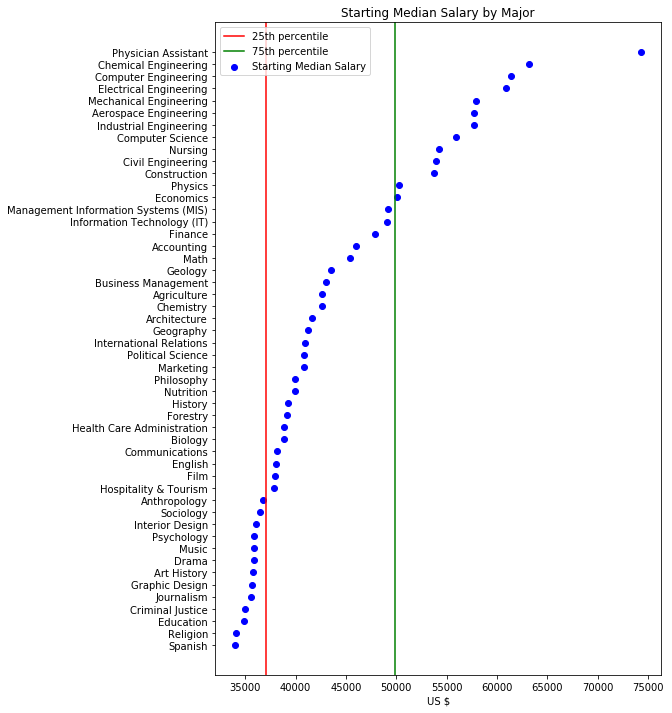

In [7]:
fig = plt.figure(figsize=(8,12))

x = sort_a['Starting Median Salary']
y = len(sort_a.index) - sort_a.index
labels = sort_a["Undergraduate Major"]

plt.scatter(x, y, color='b', label = 'Starting Median Salary')
plt.yticks(y, labels)

#Plot percentiles:
plt.axvline(x=(np.percentile(sort_a['Starting Median Salary'], 25)), color = 'red', label = '25th percentile')

plt.axvline(x=(np.percentile(sort_a['Starting Median Salary'], 75)), color = 'green', label = '75th percentile')


plt.xlabel('US $')
plt.ylabel('')
plt.title('Starting Median Salary by Major')
plt.legend(loc=2) #move the legend
plt.show()

- Looking at the majors that were at or above the 75th percentile line of (\$49875)
    - Top spot: Physicians Assistant
    - Engineering majors, nursing, economics, and physics
    - Finance, accounting and math are close behind

### Look at the change of Starting Median Salary to Mid-Career Median Salary

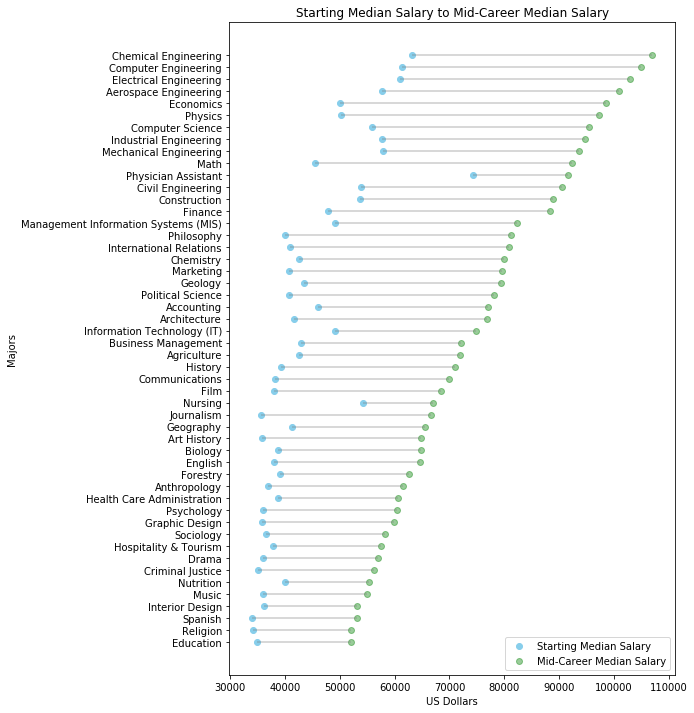

In [8]:
fig = plt.figure(figsize=(8,12))
#what order of points, starting median or mid-career:
#ordered_df = deg_pay_back.sort_values(by='Starting Median Salary')
ordered_df = deg_pay_back.sort_values(by='Mid-Career Median Salary')
my_range=range(1,len(deg_pay_back.index)+1)

plt.hlines(y=my_range, xmin=ordered_df['Starting Median Salary'], xmax=ordered_df['Mid-Career Median Salary'], color='grey', alpha=0.4)
plt.scatter(ordered_df['Starting Median Salary'], my_range, color='skyblue', alpha=1, label='Starting Median Salary')
plt.scatter(ordered_df['Mid-Career Median Salary'], my_range, color='green', alpha=0.4 , label='Mid-Career Median Salary')
plt.legend(loc = "lower right")

# Add title and axis names
plt.yticks(my_range, ordered_df['Undergraduate Major'])
plt.title("Starting Median Salary to Mid-Career Median Salary")
plt.xlabel('US Dollars')
plt.ylabel('Majors')
plt.show()

- Growth again favors STEM related majors 

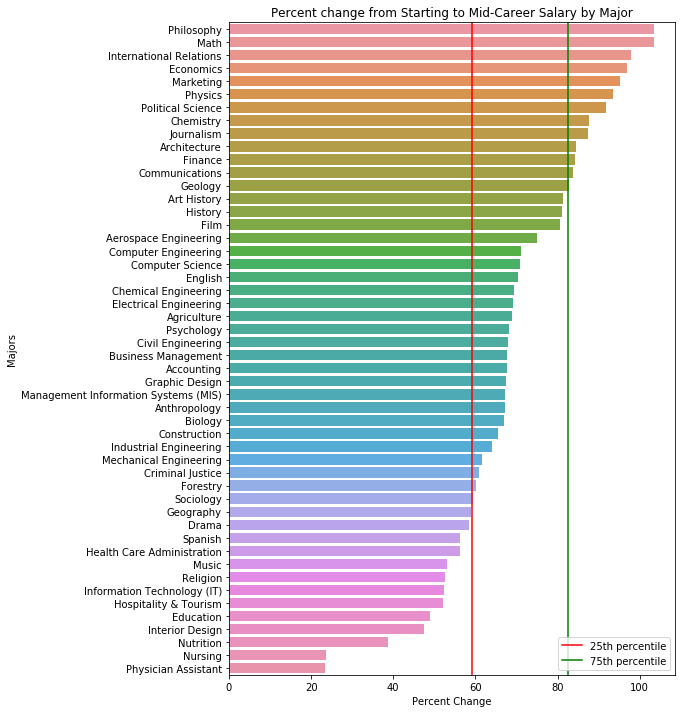

In [9]:
fig = plt.figure(figsize=(8,12))
deg_pay_back.sort_values(by = 'Percent change from Starting to Mid-Career Salary', ascending = False, inplace=True)
sort_b = deg_pay_back.reset_index()
sns.barplot(x=sort_b['Percent change from Starting to Mid-Career Salary'], y = sort_b["Undergraduate Major"], data=sort_b)

#Plot percentiles:
plt.axvline(x=(np.percentile(sort_b['Percent change from Starting to Mid-Career Salary'], 25)), color = 'red', label = '25th percentile')

plt.axvline(x=(np.percentile(sort_b['Percent change from Starting to Mid-Career Salary'], 75)), color = 'green', label = '75th percentile')


plt.xlabel('Percent Change')
plt.ylabel('Majors')
plt.title('Percent change from Starting to Mid-Career Salary by Major')
plt.legend(loc=4) #move the legend
plt.show()

- Philosophy, math, and international relations seem an almost 2X increase in salary fro the start to the middle of their careers.
- This is the only area where STEM does not dominate the top spots
- Strong initial earners like Physicians Assistant and nurses see the smallest increases in salary during that period, revealing that while they start strong there is not strong upward momentum for these careers. 

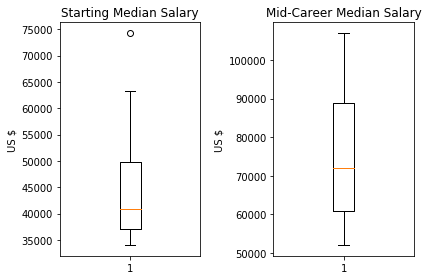

In [10]:
plt.subplot(1, 2, 1)
plt.boxplot(sort_a['Starting Median Salary'])
plt.ylabel('US $')
plt.title("Starting Median Salary")

plt.subplot(1, 2, 2)
plt.boxplot(sort_a['Mid-Career Median Salary'])
plt.title("Mid-Career Median Salary")
plt.ylabel('US $')

plt.tight_layout()
plt.show()

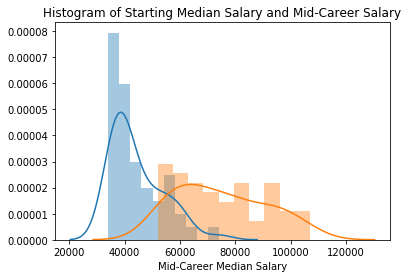

In [11]:
sns.distplot(sort_a['Starting Median Salary'], bins = 10)
sns.distplot(sort_a['Mid-Career Median Salary'], bins = 10)
plt.title("Histogram of Starting Median Salary and Mid-Career Salary")
plt.show()

- Looking at the boxplots, there is only one outlier for starting median salary which is the salary of a Physician Assistant. 
- Looking at the histogram of the starting median salary, it is slightly skewed right. 
- Looking at the Mid-career Median salary it, is less skewed right

### Look at the Trend for all majors given their percentiles over their career:

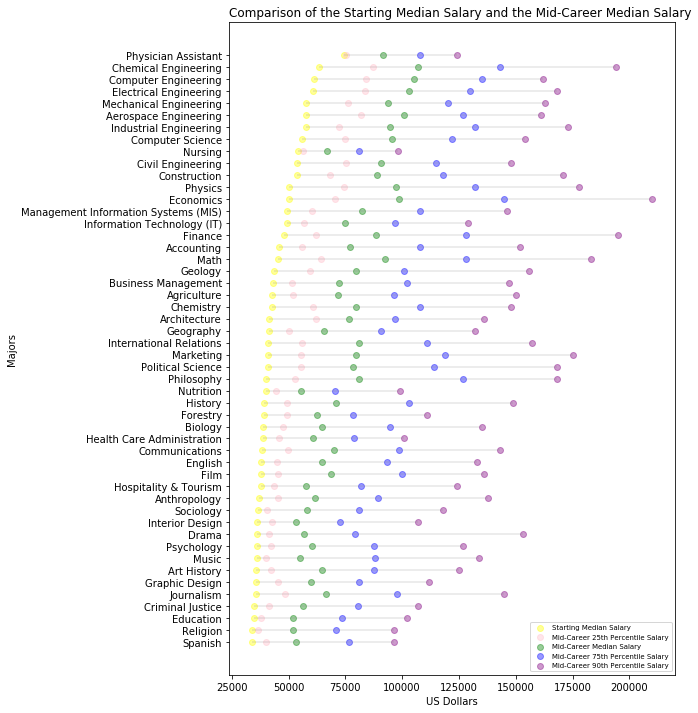

In [12]:
fig = plt.figure(figsize=(8,12))
ordered_df = deg_pay_back.sort_values(by='Starting Median Salary')
my_range=range(1,len(deg_pay_back.index)+1)

#Plot horizontal line
plt.hlines(y=my_range, xmin=ordered_df['Starting Median Salary'], xmax=ordered_df['Mid-Career 90th Percentile Salary'], color='grey', alpha=0.2)

#Starting Median Salary
plt.scatter(ordered_df['Starting Median Salary'], my_range, color='yellow', alpha=0.4, label='Starting Median Salary')
#Mid-Career(10th)
#plt.scatter(ordered_df['Mid-Career 10th Percentile Salary'], my_range, color='orange', alpha=0.4 , label='Mid-Career 10th Percentile Salary')
#Mid-Career(25th)
plt.scatter(ordered_df['Mid-Career 25th Percentile Salary'], my_range, color='pink', alpha=0.4 , label='Mid-Career 25th Percentile Salary')
#Mid-Career(50th)
plt.scatter(ordered_df['Mid-Career Median Salary'], my_range, color='green', alpha=0.4 , label='Mid-Career Median Salary')
#Mid-Career(75th)
plt.scatter(ordered_df['Mid-Career 75th Percentile Salary'], my_range, color='blue', alpha=0.4 , label='Mid-Career 75th Percentile Salary')
#Mid-Career(90th)
plt.scatter(ordered_df['Mid-Career 90th Percentile Salary'], my_range, color='purple', alpha=0.4 , label='Mid-Career 90th Percentile Salary')



plt.legend(loc = "lower right", fontsize = 'x-small')

# Add title and axis names
plt.yticks(my_range, ordered_df['Undergraduate Major'])
plt.title("Comparison of the Starting Median Salary and the Mid-Career Median Salary", loc='left')
plt.xlabel('US Dollars')
plt.ylabel('Majors')
plt.show()

- In the above plot, we show the projected growth of each major for different percentiles (excluding the 10% mid-career percentile salary)

- It is sorted from highest to lowest of starting median salary. 

- This plot shows if you are one of the most successful in your particular major, this is how much you can earn. 

- We see here that even if the starting median salary is low, you can still make more than other majors if you are very successful though this will take time. 
    - Economics has the highest 90th percentile salary even though the starting median salary is not that high. 
    - We also see that if you are really good at what you do. You can make a comfortable salary of \$100,000 or more. 


## Let's now look at another dataset of 'Salaries by College Type':
- which has 269 different universities in the United States by School Type: (Engineering, Ivy League, Liberal Arts, Party, State) with different statistics on salaries (starting medium, mid-career medium, mid-career (10th, 25th, 75th, 90th percentile)

- There are some N/As the salary columns(10th and 90th), but the 25th and 75th have no missing data. 

- Check for any duplicate School Names: We want to see if schools are classified as two types:

In [13]:
egg = sal_col_type.groupby('School Name').filter(lambda x: x['School Name'].count()>1)
duplicates = egg.groupby('School Name')['School Type'].apply(lambda x: '-'.join(x)).reset_index()
print(duplicates.shape)
duplicates

(20, 2)


,School Name,School Type
0,Arizona State University (ASU),Party-State
1,Florida State University (FSU),Party-State
2,"Indiana University (IU), Bloomington",Party-State
3,Louisiana State University (LSU),Party-State
4,Ohio University,Party-State
5,Pennsylvania State University (PSU),Party-State
6,Randolph-Macon College,Party-Liberal Arts
7,State University of New York (SUNY) at Albany,Party-State
8,"University of Alabama, Tuscaloosa",Party-State
9,"University of California, Santa Barbara (UCSB)",Party-State


- We see here that there are 20 universities with Multiple School Types
- We may want to treat these particular universities as their own type? (as mixed)
    - 95% of them are Party, State so we'll create a new school Type called ['Party_State'] 
    - We'll leave Randolph-Macon College classified as just a Liberal Arts school since I did some research and it is mostly known for that. 
    

In [14]:
egg = sal_col_type.groupby('School Name').filter(lambda x: x['School Name'].count()>1)
duplicates = egg.groupby('School Name')['School Type'].apply(lambda x: '-'.join(x)).reset_index()

In [15]:
#Merge datasets of duplicates with new 'School Type' on to original dataset
#using left join to keep all school names of sal_col_type
power = pd.merge(sal_col_type, duplicates,on ='School Name', how = 'left')

#Move all the School Types that are not multiple types
#replace NaN with number 10
power["School Type_y"] = power["School Type_y"].replace(np.nan, 10)

#replace all 10's with the school type that is not multiple types
power["School Type_y"][power["School Type_y"] == 10] = power["School Type_x"]
#drop the column that doesn't have our new group
power = power.drop(columns='School Type_x')

#change 'Randolph-Macon College' to just a Liberal Arts college:
power["School Type_y"][power["School Type_y"] == "Party-Liberal Arts"] = "Liberal Arts"
# to check: print(power_a.loc[power_a["School Name"] == 'Randolph-Macon College'])


#drop duplicates 
clean_school_type= power.drop_duplicates()
print(clean_school_type.shape)

g = clean_school_type.groupby("School Type_y")
print(g.groups.keys())

(249, 8)
dict_keys(['Engineering', 'Ivy League', 'Liberal Arts', 'Party-State', 'State'])


C:\Users\hjohnlee\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\hjohnlee\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


- We see that the shape went down by 20 from 269 to 249. This is because we took colleges that were listed as both Party or State. (20 rows were Party and 20 rows were State, total of 40 rows) and we put them into one category: Party-State (20 unique schools)

In [16]:
clean_school_type.shape
# which has 249 universities in the United States

(249, 8)

In [17]:
sal_region.shape
#which has 320 universities in the United States

(320, 8)

## Q: Let's look at salary levels based on what type of school you attend and the region where the school is located.

##### First we are going to merge the 'Salaries by College Type' and 'Salaries by Region' on School  Name

In [18]:
#rename columns in sal_region to drop later
sal_region.columns = ['School Name', 'Region', 'R_Starting Median Salary',
       'R_Mid-Career Median Salary', 'R_Mid-Career 10th Percentile Salary',
       'R_Mid-Career 25th Percentile Salary',
       'R_Mid-Career 75th Percentile Salary',
       'R_Mid-Career 90th Percentile Salary']
#Merge datasets:
egg = pd.merge(sal_region, clean_school_type, on = 'School Name')

#Drop repeating columns
combined_reg_type = egg.drop(columns=['R_Starting Median Salary',
       'R_Mid-Career Median Salary', 'R_Mid-Career 10th Percentile Salary',
       'R_Mid-Career 25th Percentile Salary',
       'R_Mid-Career 75th Percentile Salary',
       'R_Mid-Career 90th Percentile Salary'])
combined_reg_type.shape

(248, 9)

- We have now a dataset with 248 universities with school name and region and the salary statistics. 

In [19]:
combined_reg_type.groupby('Region')['Starting Median Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
California,26.0,50142.307692,8410.430337,38000.0,45550.0,48050.0,52200.0,75500.0
Midwestern,60.0,43620.000000,4561.028727,35300.0,41100.0,42700.0,45325.0,57100.0
Northeastern,67.0,49440.298507,7894.360467,37500.0,43550.0,47300.0,54000.0,72200.0
Southern,57.0,44166.666667,4473.267156,34800.0,41400.0,43100.0,46500.0,58300.0
Western,38.0,44065.789474,3942.168173,37300.0,41925.0,44400.0,46050.0,58100.0


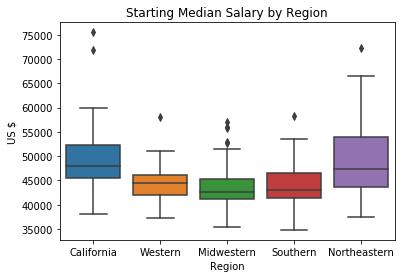

In [20]:
sns.boxplot(x=combined_reg_type['Region'], y=combined_reg_type['Starting Median Salary'], data=combined_reg_type)
plt.xlabel('Region')
plt.ylabel('US $')
plt.title("Starting Median Salary by Region")
plt.show()

- Here we see that the medain starting median salary is \$4,000 higher for California and Northeastern schools than the other regions.

- This is could be due to the very good schools being located in California(UC system) and the Northeast(Ivy League)


In [21]:
combined_reg_type.groupby('School Type_y')['Starting Median Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
School Type_y,,,,,,,,
Engineering,18.0,59411.111111,7913.271718,46200.0,54075.0,59450.0,62100.0,75500.0
Ivy League,8.0,60475.000000,3218.584427,56200.0,58825.0,59850.0,61525.0,66500.0
Liberal Arts,47.0,45746.808511,4368.854743,38500.0,42250.0,45500.0,48600.0,54500.0
Party-State,19.0,45878.947368,3711.031445,41300.0,42650.0,44700.0,48550.0,52900.0
State,156.0,43912.820513,4293.862356,34800.0,41175.0,43350.0,46125.0,59900.0


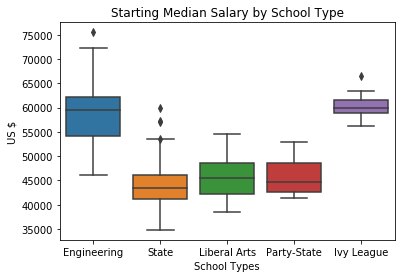

In [22]:
sns.boxplot(x=combined_reg_type['School Type_y'], y=combined_reg_type['Starting Median Salary'], data=combined_reg_type)
plt.xlabel('School Types')
plt.ylabel('US $')
plt.title("Starting Median Salary by School Type")
plt.show()


- Here we see that the median 'starting median salary' about \$10,000 more for Engineering schools and Ivy League schools compared to the other School Types. 

### Boxplot of Region of School and Salary over Time

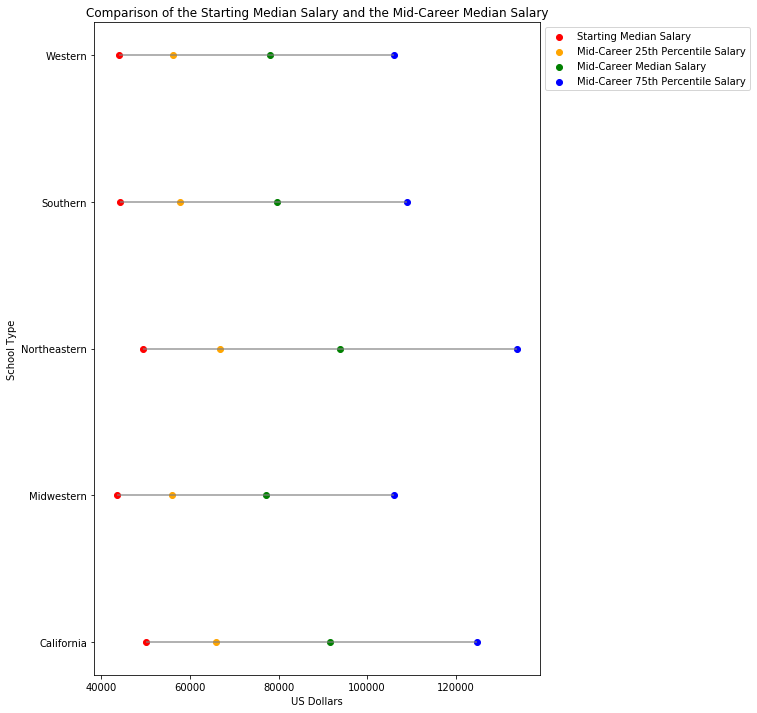

In [23]:
by_region = combined_reg_type.groupby('Region')['Starting Median Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career Median Salary', 'Mid-Career 75th Percentile Salary'].mean()
by_region.index
fig = plt.figure(figsize=(8,12))
ordered_df = by_region.sort_values(by='Starting Median Salary')
my_range=range(1,len(by_region.index)+1)

#Plot horizontal line
plt.hlines(y=my_range, xmin=by_region['Starting Median Salary'], xmax=by_region['Mid-Career 75th Percentile Salary'], color='grey', alpha=0.8)

#Starting Median Salary
plt.scatter(by_region['Starting Median Salary'], my_range, color='red', label='Starting Median Salary')

#Mid-Career(25th)
plt.scatter(by_region['Mid-Career 25th Percentile Salary'], my_range, color='orange' , label='Mid-Career 25th Percentile Salary')

#Mid-Career(50th)
plt.scatter(by_region['Mid-Career Median Salary'], my_range, color='green' , label='Mid-Career Median Salary')

#Mid-Career(75th)
plt.scatter(by_region['Mid-Career 75th Percentile Salary'], my_range, color='blue' , label='Mid-Career 75th Percentile Salary')

plt.legend(loc = 0, fontsize = 'medium', bbox_to_anchor=(1, 1))

# Add title and axis names
#School Type_y, Region
plt.yticks(my_range, by_region.index)
plt.title("Comparison of the Starting Median Salary and the Mid-Career Median Salary")
plt.xlabel('US Dollars')
plt.ylabel('School Type')
plt.show()

- Here we see that people that graduated from Northeastern universities have a higher Starting Median Salary and Mid-Career Salary, this may be due to many of the northeastern univeristies being ivy league universities. 

### Boxplot of School Type and Salary over Time

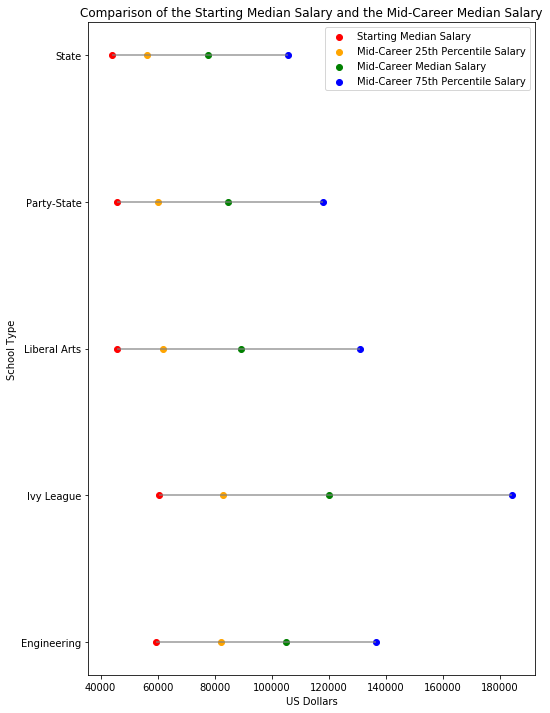

In [24]:
by_school_type = combined_reg_type.groupby('School Type_y')['Starting Median Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career Median Salary', 'Mid-Career 75th Percentile Salary'].mean()
by_school_type.index
fig = plt.figure(figsize=(8,12))
ordered_df = by_school_type.sort_values(by='Starting Median Salary')
my_range=range(1,len(by_school_type.index)+1)

#Plot horizontal line
plt.hlines(y=my_range, xmin=by_school_type['Starting Median Salary'], xmax=by_school_type['Mid-Career 75th Percentile Salary'], color='grey', alpha=0.8)

#Starting Median Salary
plt.scatter(by_school_type['Starting Median Salary'], my_range, color='red', label='Starting Median Salary')

#Mid-Career(25th)
plt.scatter(by_school_type['Mid-Career 25th Percentile Salary'], my_range, color='orange' , label='Mid-Career 25th Percentile Salary')

#Mid-Career(50th)
plt.scatter(by_school_type['Mid-Career Median Salary'], my_range, color='green' , label='Mid-Career Median Salary')

#Mid-Career(75th)
plt.scatter(by_school_type['Mid-Career 75th Percentile Salary'], my_range, color='blue' , label='Mid-Career 75th Percentile Salary')

plt.legend(loc = "upper right", fontsize = 'medium')

# Add title and axis names
#School Type_y, Region
plt.yticks(my_range, by_school_type.index)
plt.title("Comparison of the Starting Median Salary and the Mid-Career Median Salary")
plt.xlabel('US Dollars')
plt.ylabel('School Type')
plt.show()

- This plot here further illustrates the point that Ivy League graduates do very well coming out of college and do very well in the future. 

## Boxplot of School Type/Region and Salary over Time

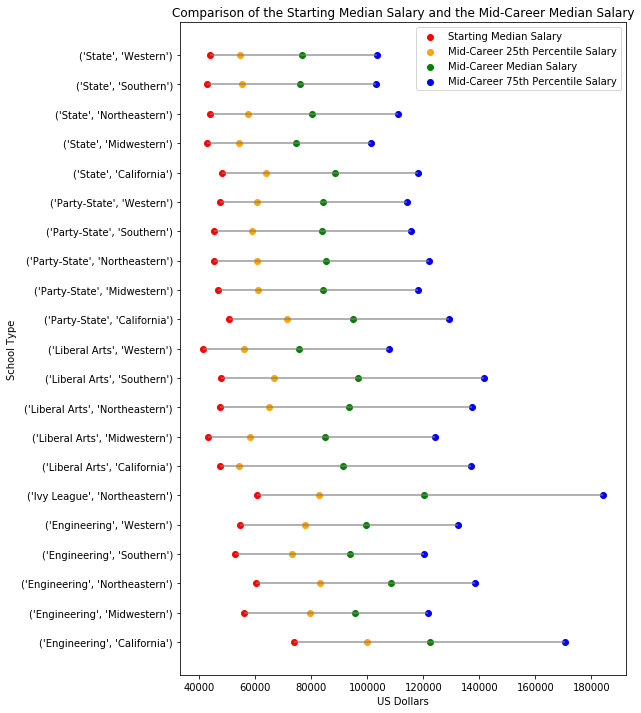

In [25]:
by_all = combined_reg_type.groupby(['School Type_y', 'Region'])['Starting Median Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career Median Salary', 'Mid-Career 75th Percentile Salary'].mean()
by_all.index
fig = plt.figure(figsize=(8,12))
ordered_df = by_all.sort_values(by='Starting Median Salary')
my_range=range(1,len(by_all.index)+1)

#Plot horizontal line
plt.hlines(y=my_range, xmin=by_all['Starting Median Salary'], xmax=by_all['Mid-Career 75th Percentile Salary'], color='grey', alpha=0.8)

#Starting Median Salary
plt.scatter(by_all['Starting Median Salary'], my_range, color='red', label='Starting Median Salary')

#Mid-Career(25th)
plt.scatter(by_all['Mid-Career 25th Percentile Salary'], my_range, color='orange' , label='Mid-Career 25th Percentile Salary')

#Mid-Career(50th)
plt.scatter(by_all['Mid-Career Median Salary'], my_range, color='green' , label='Mid-Career Median Salary')

#Mid-Career(75th)
plt.scatter(by_all['Mid-Career 75th Percentile Salary'], my_range, color='blue' , label='Mid-Career 75th Percentile Salary')

plt.legend(loc = "upper right", fontsize = 'medium')

# Add title and axis names
#School Type_y, Region
plt.yticks(my_range, by_all.index)
plt.title("Comparison of the Starting Median Salary and the Mid-Career Median Salary")
plt.xlabel('US Dollars')
plt.ylabel('School Type')
plt.show()

-  For a more in-depth split, 

    - The best 'STATE' schools are in the California in terms of Starting Median salary and 'Mid-Career 75th Percentile Salary.

    - The best 'Party-State' schools are all fairly similiar for all regions, but Party-State schools in California have the highest Starting Median salary and 'Mid-Career 75th Percentile Salary. 
    
    - The best 'Liberal Arts' schools are fairly similiar for Starting Median salary with Southern, Midwestern, and California. Long-term wise, going to a Liberal Arts school in the Southern region proves to have a higher mid-career salary.
    
    - The best 'Engineering' schools are the ones located in California for both Starting and Mid-Career Salaries. 


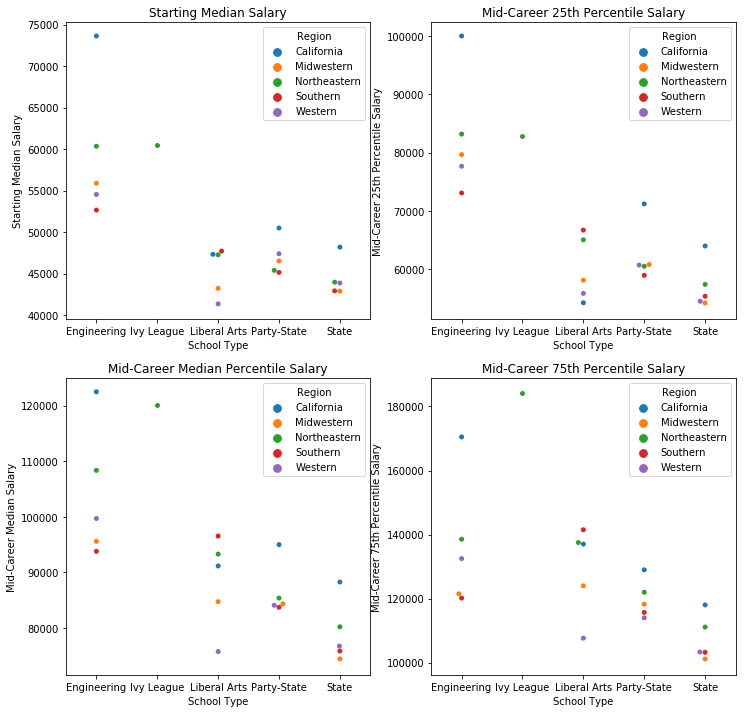

In [26]:
by_all = combined_reg_type.groupby(['School Type_y', 'Region'])['Starting Median Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career Median Salary', 'Mid-Career 75th Percentile Salary'].mean()
by_all.index
#type(by_all)
both_reg_school = by_all.reset_index()

fig = plt.figure(figsize=(12,12))
plt.subplot(2, 2, 1)
sns.swarmplot(x='School Type_y', y ='Starting Median Salary',hue='Region', data=both_reg_school)
plt.title("Starting Median Salary")
plt.xlabel("School Type")

plt.subplot(2, 2, 2)
sns.swarmplot(x='School Type_y', y ='Mid-Career 25th Percentile Salary',hue='Region', data=both_reg_school)
plt.title("Mid-Career 25th Percentile Salary")
plt.xlabel("School Type")


plt.subplot(2, 2, 3)
sns.swarmplot(x='School Type_y', y ='Mid-Career Median Salary',hue='Region', data=both_reg_school)
plt.title("Mid-Career Median Percentile Salary")
plt.xlabel("School Type")

plt.subplot(2, 2, 4)
sns.swarmplot(x='School Type_y', y ='Mid-Career 75th Percentile Salary',hue='Region', data=both_reg_school)
plt.title("Mid-Career 75th Percentile Salary")
plt.xlabel("School Type")
plt.show()

- These plots further emphasize the above plot about which shows the splits between region, school type, and different salary levels.

#### Maps of Starting Median Salary and Mid-Career Median Salary for each Region:

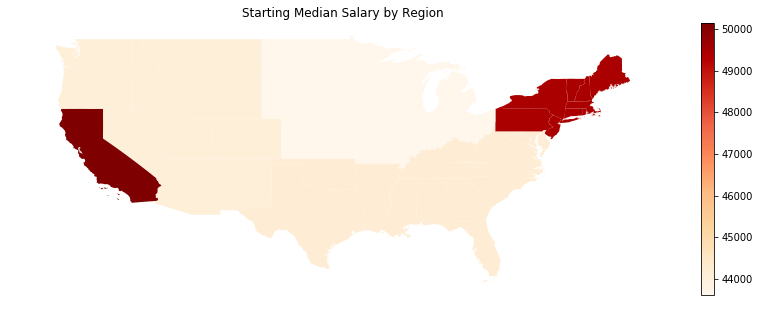

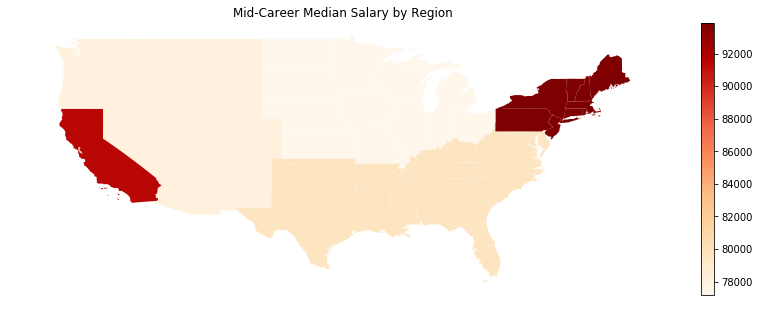

In [27]:
import geopandas as gpd
# Store starting median salaries of each region into data frame
region_salary = pd.DataFrame(combined_reg_type.groupby('Region')['Starting Median Salary'].mean())

# Read in shapefile for mapping of US states
states = gpd.GeoDataFrame.from_file('C:/Users/hjohnlee/Downloads/Collage/17-18/Spring 2018/Stats 131/final project/state shapefile/cb_2017_us_state_500k.shp')

# Get rid of Guam, Mariana Islands and Virgin Islands
states = states[states.STATEFP.astype(int) < 60]
# Get rid of Hawaii, Alaska, and DC
states = states[~states.NAME.isin(['Hawaii', 'Alaska', 'District of Columbia'])]

# Lists of all US regions
California = ['California']
Northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont',
            'New Jersey', 'New York', 'Pennsylvania']
Midwest = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin',
             'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
South = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia',
           'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
West = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming',
          'Alaska', 'Hawaii', 'Oregon', 'Washington']
salary = []

# Assign salary value to each state, depending on which region it belongs to
for st in states['NAME']:
    if st in California:
        salary.append(region_salary.loc['California', 'Starting Median Salary'])
    elif st in Northeast:
        salary.append(region_salary.loc['Northeastern', 'Starting Median Salary'])
    elif st in Midwest:
        salary.append(region_salary.loc['Midwestern', 'Starting Median Salary'])
    elif st in South:
        salary.append(region_salary.loc['Southern', 'Starting Median Salary'])
    elif st in West:
        salary.append(region_salary.loc['Western', 'Starting Median Salary'])
        
states['SALARY'] = salary

# Plot the continental US
us_map = states.plot(column = 'SALARY', cmap = 'OrRd', legend = True, figsize=(15, 5))
us_map.set_title('Starting Median Salary by Region')
us_map.axis('off')
plt.show()

# Do the same for mid-career median salaries
region_mid_salary = pd.DataFrame(combined_reg_type.groupby('Region')['Mid-Career Median Salary'].mean())

mid_salary = []

# Assign salary value to each state, depending on which region it belongs to
for st in states['NAME']:
    if st in California:
        mid_salary.append(region_mid_salary.loc['California', 'Mid-Career Median Salary'])
    elif st in Northeast:
        mid_salary.append(region_mid_salary.loc['Northeastern', 'Mid-Career Median Salary'])
    elif st in Midwest:
        mid_salary.append(region_mid_salary.loc['Midwestern', 'Mid-Career Median Salary'])
    elif st in South:
        mid_salary.append(region_mid_salary.loc['Southern', 'Mid-Career Median Salary'])
    elif st in West:
        mid_salary.append(region_mid_salary.loc['Western', 'Mid-Career Median Salary'])
        
states['MID_SALARY'] = mid_salary

# Plot the continental US
us_map = states.plot(column = 'MID_SALARY', cmap = 'OrRd', legend = True, figsize=(15, 5))
us_map.set_title('Mid-Career Median Salary by Region')
us_map.axis('off')
plt.show()

## Data Modeling:

##### Overview:
After exploring the data, we have a strong reason to believe that school name, school type and region could be significant predictors of starting median salary. To validate our suspicions we ran several different types of predictive models to see if a certain machine learning algorithm could uncover the exact type of relationship between these three predictors and salary. The model types encompass both complex and simple methods and operate off of a number of different assumptions. To ensure our results are robust we use 5-fold cross validation to simultaneous train and test the different model and record their mean square error - our main evaluation metric. Given that this is a regression problem mean square error seemed an appropriate loss function, but we also used R-Squared and mean abolsute error to further understand performance. R-squared was chosen for the ease of interpretation and MAE is an outlier resistant measure of error and thus desirable with such a small data set the presence of an outlier could lead to significant bias error. 

##### The Small Data Concern:
The small size of our modeling data set raises one potential concern - large variance in evaluation metrics depending on the data split. This phenomenon can be seen below, as during cross validation the split greatly effected the performance of the model. However, we can still compare how models perform on a given fold to each other, and see which models perform the best on the ajority of the folds. 

In [28]:
# use label encoding on the categorical variables for modeling purposes
from sklearn.preprocessing import LabelEncoder

# label encode all categorical variables 
lb_make = LabelEncoder()
combined_reg_type["Schoolname_code"] = lb_make.fit_transform(combined_reg_type["School Name"])
combined_reg_type["region_code"] = lb_make.fit_transform(combined_reg_type["Region"])
combined_reg_type["SchoolType_code"] = lb_make.fit_transform(combined_reg_type["School Type_y"])
#combined_reg_type[label_ls] = le.transform(combined_reg_type[label_ls])


#### Algorithm Description:
- Linear Regression: most desirable outcome for simplicity sake
- Random forest
- Support vector Machine - Linear kernel
- Support Vector Machine - Radial Basis function for using SVM's for nonlinear relations
- K-Nearest Neighbors 

In [29]:
# lets compare 4 different regression techniques and see which ones perform the best 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

X = combined_reg_type[['Schoolname_code', 'region_code', 'SchoolType_code']].values
y = combined_reg_type['Starting Median Salary'].values

# define potential model options and parameters to set them at 
models = [
    RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    SVR(kernel = 'rbf'), # non-linear kernel
    SVR(kernel = 'linear'), # linear kernel
    KNeighborsRegressor(n_neighbors=5),
    LinearRegression(),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    MSE = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=CV)
    Explained_var = cross_val_score(model, X, y, scoring='r2', cv=CV)
    for fold_idx, mse in enumerate(MSE):
        entries.append((model_name, fold_idx, MSE[fold_idx], Explained_var[fold_idx]))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'MSE', 'Variance Explained'])


In [30]:
cv_df['MSE'] = abs(cv_df['MSE'])
cv_df['model_name'][5:10] = 'RBF SVM'
cv_df['model_name'][10:15] = 'Linear SVM'

C:\Users\hjohnlee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hjohnlee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


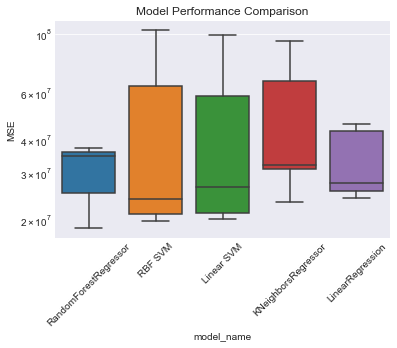

In [31]:
sns.set_style("darkgrid")
sns.boxplot(x = 'model_name', y = "MSE", data = cv_df) # plot boxplots of MSE
plt.yscale('log') # log scale y 
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()
# such a small data set is responsible for large flucuations in MSE

###### Decision Theory:
While the SVM's have a lower mean MSE, they see tremendous variation in MSE values depending on how the data is split, which indicates they are highly sensitive and poor generalizers. The Random Forest and linear models however combine low MSE scores with significantly less variation then the other models, making them the ideal models of choice. 

One issue with using cross-validaiton on such a small data set was that we were not able to use R-Squared during CV as a evaluation metric. The r-squared metric from the python sklearn package can actually return negative values, and so for some folds certain models reported almost nonsensical r-squared metrics. Averaging these values did little to help compare the models. 

C:\Users\hjohnlee\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


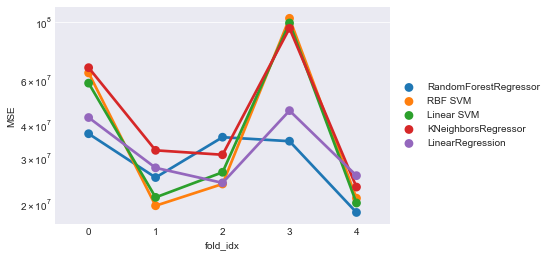

In [32]:
# plot of model performance by fold
sns.set_style("darkgrid")
sns.pointplot(x = 'fold_idx', y = 'MSE', data = cv_df, hue = 'model_name')
plt.yscale('log') 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# here you can see the instability of the folds, 4th fold seems to be the worst in
# in terms of performance

Above we can actually see how the folds can greatly influence model performance based on the random split. Somehow, fold 4 resulted in a data split that troubled the models while split 2 made it easiest for them to identify the trends. But we see the same story as above, the randomf forest and linear regression models are fa less influenced by data split, and generally improve as CV continues.

## Model Selection

We should choose to narrow down our models choices to linear regression and random forests because they have the smallest overall variance for the MSE by the folds, and thus seem to be much more stable options considering how little data we are working with here.

We will now retrain the models on the whole data set so that we cab minimize the potential bias injected by folding a small dataset.

In [33]:
# define model parameters 
linearmod = LinearRegression()
rfmod = RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0,
                              max_features = 2)

# fit to full data 
linearmod.fit(X,y)
rfmod.fit(X,y)

linear_preds = linearmod.predict(X)
rf_preds = rfmod.predict(X)

# import MSE, r-squared, and MAE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Mean Squared Error Comparison: LM - "  + str(mean_squared_error(y, linear_preds)) + " vs. RF - "  + str(mean_squared_error(y, rf_preds)))
print("Mean Absolute Error Comparison: LM - "  + str(mean_absolute_error(y, linear_preds)) + " vs. RF - "  + str(mean_absolute_error(y, rf_preds)))
print("R-Squared Comparison: LM - "  + str(r2_score(y, linear_preds)) + " vs. RF - "  + str(r2_score(y, rf_preds)))


Mean Squared Error Comparison: LM - 25351266.109713946 vs. RF - 15912848.270586548
Mean Absolute Error Comparison: LM - 3979.8628435277387 vs. RF - 3140.954233533936
R-Squared Comparison: LM - 0.41329761717912605 vs. RF - 0.6317301882511186


We choose three different performance metrics to evaluate our models on, two that consider error and one that considers explanatory power. Our error metrics are MSE and MAE, which both measure a given predictions deviation from its true value, but our MAE score will represent a score less effected by outliers. Considering how small our data sample is, it is important we look at both of these metrics so we can ensure that one model is not just superior at fitting potential outliers. Our R-Squared metric will measure the % variation in our outcome, median starting salary, explained by our model and is a holistic view of how well our model performs.

We can see from the output that our random forest model does significantly better on each metric compared to our linear model and so will represent our final model. It is possible to further improve the performance of our random forest by tuning the number of trees grown, altering the number of observations in the terminal nodes, or changing the depth of our trees.

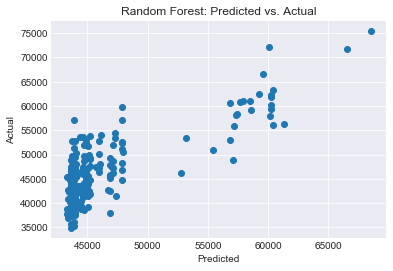

In [34]:
# Visualizing Best Model Performance
# Predicted vs. Actual 
plt.scatter(rf_preds, y)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest: Predicted vs. Actual')
plt.show()
# so we can see that what are rf does better than the linear model is
# predict the higher salaries more accurately, while it tends to underpredict
# the lower salaries/cluster them together. 

- we can see that what are rf does better than the linear model is predict the higher salaries more accurately, while it tends to underpredict the lower salaries/cluster them together. 

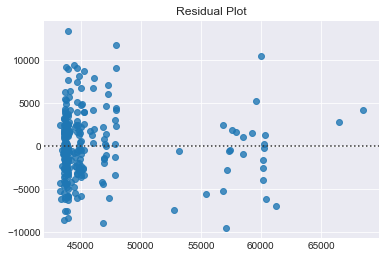

In [35]:
# residual plot 
sns.residplot(rf_preds, y)
plt.title('Residual Plot')
plt.show()

- here we can see further evidence that we get unstable predictions around the lower salaries as they have a higher residual variance still no overwhelming pattern to be concerned with 

# Predicting Salary by Job Posting
To augment our exploratory analysis and modeling, we choose to also attempt to predict salary based on the text in a given posting. To ease computation, we only analyze a random sample of 20,000 posting from the initial data set and draw inference from there. Again, we focus on comparing 4 different models through 5 fold cross validation but in a classification context as the salaries are divided into four different brackets. 

#### Input Features
The features for the models were dervied using the text processing technique Term frequency - Inverse Document Frequency. This method essentials comes up with a weighted score for a set of unigram and bigrams taken from each job posting based on its "in-document" frequency compared to the overall frequency in the corpus. 

#### Outcomes
- High Paying 50k+
- Above Average 32.5k-50k
- Mid Pay 20k-32.5k
- Low Pay 0-20k

In [36]:
# check structure
data.info() # 35,798 values remaining 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35798 entries, 2020 to 244750
Data columns (total 12 columns):
Id                    35798 non-null int64
Title                 35798 non-null object
FullDescription       35798 non-null object
LocationRaw           35798 non-null object
LocationNormalized    35798 non-null object
ContractType          35798 non-null object
ContractTime          35798 non-null object
Company               35798 non-null object
Category              35798 non-null object
SalaryRaw             35798 non-null object
SalaryNormalized      35798 non-null int64
SourceName            35798 non-null object
dtypes: int64(2), object(10)
memory usage: 3.6+ MB


In [37]:
# create a subsample for faster computations 
data = data.sample(n = 20000, replace = False, random_state = 100)
# random sample 20000 entries without replacement 
# Turn this into a classification problem by creating salary category options
data.SalaryNormalized.describe()

count     20000.000000
mean      35840.518700
std       17048.741608
min        5000.000000
25%       24315.000000
50%       32500.000000
75%       43150.000000
max      199200.000000
Name: SalaryNormalized, dtype: float64

In [38]:
data.SalaryNormalized.median()

32500.0

- note: normalized salary just means the midpoint of of the raw salary found in the job posting 

In [39]:
# creating categorical salary option
data['SalaryRange'] = 'Low Paying (0-20k)'

data.loc[(data['SalaryNormalized'] > 20000) & (data['SalaryNormalized'] <= 32500), 'SalaryRange'] = 'Mid Paying (20k-35k)'
data.loc[(data['SalaryNormalized'] > 32500) & (data['SalaryNormalized'] <= 50000), 'SalaryRange'] = 'Above Avg (35k-50k)'
data.loc[(data['SalaryNormalized'] > 50000), 'SalaryRange'] = 'High Paying (50k+)'

### Class Distributions 

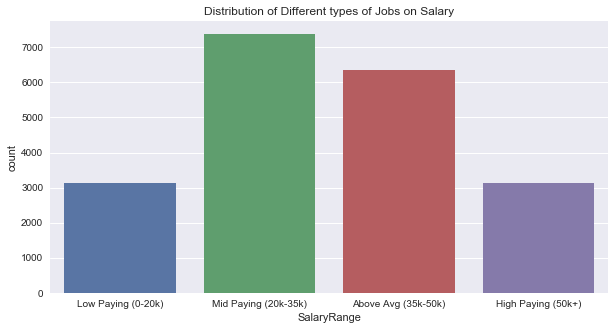

In [40]:
# Visualize Salary Range 
import seaborn as sns
fig = plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.countplot(x = 'SalaryRange', data = data)
plt.title("Distribution of Different types of Jobs on Salary")
plt.show()

- we see that most jobs are mid and above average paying, data seems to be normally dist by class

### NLP to understand what words in the title and the job description are associated with each range 
To properly work with text data, we used the TfidfVectorizer from sklearn to extract text features from our job postings. In essence, this package breaks down a document by removing common words in the english language that have less meaning, words like "the," and using the remaining words as features. Those words are used as features in a standalone context, and then combined with each other to create bigrams that do not necessarily respect word order or sentence structure. This causes some information to be lost because sentence structure is ignored and the location of the word in the document is not stored but is still a very powerful tool in document analysis. 

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# creating tfidf vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=15, norm='l2', encoding='latin-1', 
                        ngram_range=(1, 2), stop_words='english', lowercase = True)

# sublinear creates log scale of frequency, so increased counts have less weight then normal
# min_df is the minimum number of times it needs to occur in total doc
# ngram for both one-gram and two-grams are considered
# remove english stop words
# l2 norm is being applied here 

featuresS = tfidf.fit_transform(data.FullDescription).toarray() # collect our features 
featuresS.shape # we have 31427 different features in our data 


(20000, 31427)

In [42]:
from io import StringIO

# found this online so not quite sure what it does but it helps with modeling 
# will learn exactly what it is doing 
data['salaryRange_id'] = data['SalaryRange'].factorize()[0]
salary_id_df = data[['SalaryRange', 'salaryRange_id']].drop_duplicates().sort_values('salaryRange_id')
salary_to_id = dict(salary_id_df.values)

id_to_salaryR = dict(salary_id_df[['salaryRange_id', 'SalaryRange']].values)

labels = data.salaryRange_id

# Correlated unigrams and bigrams with each salary range 
Below we print out the most correlated words and word pairs with each salary range, which will give us an idea of what features (words) will be important for the models. We use chi-square dependance test to evaulate "correlation"

In [43]:
# import necessary module
from sklearn.feature_selection import chi2

N = 5 # return 5 most correlated per unigram and bigram 
for SalaryRange, salaryRange_id in sorted(salary_to_id.items()):
    features_chi2 = chi2(featuresS, labels == salaryRange_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
    print("# '{}':".format(SalaryRange))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
    print("  . Most correlated trigrams:\n. {}".format('\n. '.join(trigrams[-N:])))
    
# its not in order which i annoying but we get some interesting results 

# 'Above Avg (35k-50k)':
  . Most correlated unigrams:
. embedded
. hours
. project
. graduate
. assistant
  . Most correlated bigrams:
. hours week
. embedded software
. account director
. teaching assistant
. customer service
  . Most correlated trigrams:
. 
# 'High Paying (50k+)':
  . Most correlated unigrams:
. senior
. strategic
. finance
. director
. financial
  . Most correlated bigrams:
. financial controller
. senior manager
. audit manager
. finance director
. qualified accountant
  . Most correlated trigrams:
. 
# 'Low Paying (0-20k)':
  . Most correlated unigrams:
. monday
. nursery
. hours
. graduate
. assistant
  . Most correlated bigrams:
. nursery nurse
. support assistant
. learning support
. customer service
. teaching assistant
  . Most correlated trigrams:
. 
# 'Mid Paying (20k-35k)':
  . Most correlated unigrams:
. strategic
. nursing
. nqt
. teachers
. teacher
  . Most correlated bigrams:
. primary teachers
. teaching assistant
. staff nurse
. qualified accountant

# Results Word Correlation Analysis 
Looking at the results above a few things jump out pretty quickly that helps differentiate between the possible salary ranges.

- "High Paying": Words associated with finance and seniority are strongly associated with this group as well as strategy. This seems pretty intuitive as finance and manager jobs are usually associated with high pay.

- "Above Average Pay": Words associated like graduate and assistant as well as account director and embedded software show up as highly correlated with above average pay. Logically, graduate students and software developers tend to demand above avergae pay for the large amount of time spent studying and honing their craft.

- "Mid Paying": Words like nursing/nurse and teacher are highly correlated with this category and seem to make up what can be considered essential societal jobs. Teachers, nurses and accountants are vital for society to function and thus tend to make standard pay but are not a part of high flying industries like tech or finance that are known for large salaries. 

- "Low Paying": Low paying jobs seem to be associated with words that indicate entry level positions like teaching assistant, hours (for hourly pay), customer support, and learning assistant. 

# Four Model Comparison for Predicting Salary 
Below we will compare four different clasification techniques to see which one will yield the best accuracy in predicting salary category using unigram and bigram words from the job posting. Our potential models range from simple to complex, and cover both linear and non-linear options so we can try multiple strategies for modeling our data. 

Model Options: Logistic Regression, Naive Bayes, Random Forest, Linear Support Vector Classifier

Five-Fold Cross Validation is used to estimate accuracy and provide a robust estimate for model performance. 

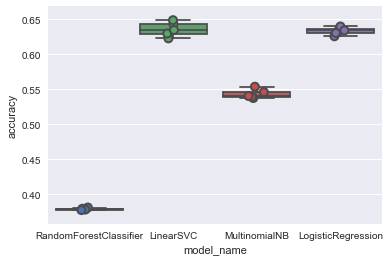

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
# consider adding KNN, LDA classifers? 
# define potential model options and parameters to set them at 
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, featuresS, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

- The best model based on accuracy was the Linear SVM, followed closely by the logistic model. This seems to indicate that the data can be linearly separated.


# Understanding how our best model performs

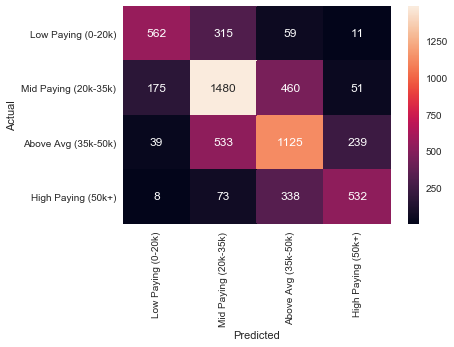

In [45]:
# we are going to train a model with a trainign test split approach because we already used CV to
# ID the best model. This way we can now start to understand some of our accuracy metrics and 
# where the model is over or under performing.
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
model = LinearSVC() # define model

# train linear svm 70% training
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(featuresS, labels, data.index, test_size=0.30, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test) # predict class label for unseen data



# create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# use seaborn to create a heat map that represents a confusion matrix 
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=salary_id_df.SalaryRange.values, yticklabels=salary_id_df.SalaryRange.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Interpretation:

- One pretty interesting thing about the above confusion matrix is that we can see that when the algorithm misclassifies a given observation it tends to predict the next closest salary type. What this means is that it is highly unlikely that it will misclassify a low paying job as a high paying job, but may misclasify it as a mid paying job. This means there is definitely a word structure that can be used to create distinctions between the types of salaryies. 
- The majority of observations are classified as mid-paying, which is the largest clas by number


In [46]:
# lets check some more metrics 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

Accuracy_Score = accuracy_score(y_test, y_pred)
Precision_Score = precision_score(y_test, y_pred,  average="macro")
Recall_Score = recall_score(y_test, y_pred,  average="macro")

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.72      0.59      0.65       947
          1       0.62      0.68      0.65      2166
          2       0.57      0.58      0.57      1936
          3       0.64      0.56      0.60       951

avg / total       0.62      0.62      0.62      6000



- looks like we end up getting an avergae of 62% across the board for these metrics. 

- precision = positive predictive value = how many of the predicted class is actually that class?

- recall = sensitivity = how many of class1 were predicted as class 1?

- So looking at this we can see that our algorithm was best at predicting low paying via precision

- 72% of low paying were actually low paying and had the best sensitivity score 

- 68% of all mid class were predicted correctly

# Summary
After exploring how different aspects of a college and major can effect a students earnings prospect after college, we found that there is significant variation between earnings prospects and many different related variables. Major has an outsized effect on earning power and effects a students salary throughout there entire life, contributing to both starting salary and salary growth throughout their career. We saw that high salary growth is not just associated with high earning potential, and some majors that start out with high salaries barely see an increase (Physicians Assistant with a 20% salary increase) while others like Philosophy start with low salaries but can double by their mid-career point. A university's reputation as a party-school has shown to hurt student's earning potential and Ivy league schools have stood out as a major driver of higher salaries for their students. Interestingly enough, there are two regions in the country that experience above average earning prospects for their students, California and the North East. We believe that these two regions of the country contain a number of elite universities, like Ivy league schools in the North East and UC's in California, that contribute to this phenomenon. Also, both of these regions are considered major economic and employment zones with very attractive jobs and industries that likely contributing to the effect of these regions of earning power. 

We found that you can use the above variables, college name, region and type, to accurately predict starting salaries with only an average error of $4,000 per prediction. Our model captured 63% of the variation in the data, and if a few more predictors could be added to the model we could see a significant boost in performance. Our second model used words found in job postings to predict a salary class with 65% accuracy. We found that words associated with finance, consulting, auditing, and software enginerring were associated with hgiher paying jobs, as well as words associated with seniority. The average and lower paying job postings were filled with words associated with customer service, nursing and teaching and these findings confirmed our earlier analysis of major on salary. 

With ever rising levels of student debt cripling many people as they leave college, we believe it is pertinent that students understand how their choice in school and major will effect their ability to pay off their debt and at what rate. We are not advocating for students to pursue STEM and Ivy league schools for the purpose of making money, but realistic salary expectations wil help students continue to make informed financial decisions throughout their college and ealry life. 